In [279]:
# In this example, we will use the linear regression model to predict the
# survived passengers in the Titanic dataset.
# we will use gradient descent to train the model.
# we will use Numpy to implement the model.

In [280]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [281]:
# Load the titanic dataset as a pandas dataframe
data = pd.read_csv('./train.csv')

In [282]:
# drop the columns that we don't need
# drop passengerID, Ticket, Cabin,
data = data.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)

In [283]:
# replace Name with the length of the name
data['Name'] = data['Name'].apply(lambda x: len(x))

# replace Sex with 0 for female, 1 for male
data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'male' else x)
data['Sex'] = data['Sex'].apply(lambda x: 0 if x == 'female' else x)

# find the mean age of survived the passengers
mean_age = data[data['Survived'] == 1]['Age'].mean()
# find the mean age of not survived the passengers
mean_age2 = data[data['Survived'] == 0]['Age'].mean()
# replace the missing age of survived passengers with the mean age of survived passengers
data.loc[(data['Survived'] == 1) & (data['Age'].isnull()), 'Age'] = mean_age
# replace the missing age of not survived passengers with the mean age of not survived passengers
data.loc[(data['Survived'] == 0) & (data['Age'].isnull()), 'Age'] = mean_age2


# replace the missing SibSp values of survived passengers with the mean SibSp of survived passengers
mean_sibsp = data[data['Survived'] == 1]['SibSp'].mean()
data.loc[(data['Survived'] == 1) & (data['SibSp'].isnull()), 'SibSp'] = mean_sibsp
# replace the missing SibSp values of not survived passengers with the mean SibSp of not survived passengers
mean_sibsp2 = data[data['Survived'] == 0]['SibSp'].mean()
data.loc[(data['Survived'] == 0) & (data['SibSp'].isnull()), 'SibSp'] = mean_sibsp2

# replace the missing Parch values of survived passengers with the mean Parch of survived passengers
mean_parch = data[data['Survived'] == 1]['Parch'].mean()
data.loc[(data['Survived'] == 1) & (data['Parch'].isnull()), 'Parch'] = mean_parch
# replace the missing Parch values of not survived passengers with the mean Parch of not survived passengers
mean_parch2 = data[data['Survived'] == 0]['Parch'].mean()
data.loc[(data['Survived'] == 0) & (data['Parch'].isnull()), 'Parch'] = mean_parch2

# replace the missing Fare values of survived passengers with the mean Fare of survived passengers
mean_fare = data[data['Survived'] == 1]['Fare'].mean()
data.loc[(data['Survived'] == 1) & (data['Fare'].isnull()), 'Fare'] = mean_fare
# replace the missing Fare values of not survived passengers with the mean Fare of not survived passengers
mean_fare2 = data[data['Survived'] == 0]['Fare'].mean()
data.loc[(data['Survived'] == 0) & (data['Fare'].isnull()), 'Fare'] = mean_fare2

# replace Emparked with 0 for S, 1 for C, 2 for Q
data['Embarked'] = data['Embarked'].apply(lambda x: 0 if x == 'S' else x)
data['Embarked'] = data['Embarked'].apply(lambda x: 1 if x == 'C' else x)
data['Embarked'] = data['Embarked'].apply(lambda x: 2 if x == 'Q' else x)

# replace the missing Embarked values of survived passengers with the mean Embarked of survived passengers
mean_embarked = data[data['Survived'] == 1]['Embarked'].mean()
data.loc[(data['Survived'] == 1) & (data['Embarked'].isnull()), 'Embarked'] = mean_embarked
# replace the missing Embarked values of not survived passengers with the mean Embarked of not survived passengers
mean_embarked2 = data[data['Survived'] == 0]['Embarked'].mean()
data.loc[(data['Survived'] == 0) & (data['Embarked'].isnull()), 'Embarked'] = mean_embarked2

In [284]:
# partition the data into training and testing data
# we will use 80% of the data for training and 20% for testing
train_data = data.sample(frac=0.8, random_state=200)
test_data = data.drop(train_data.index)

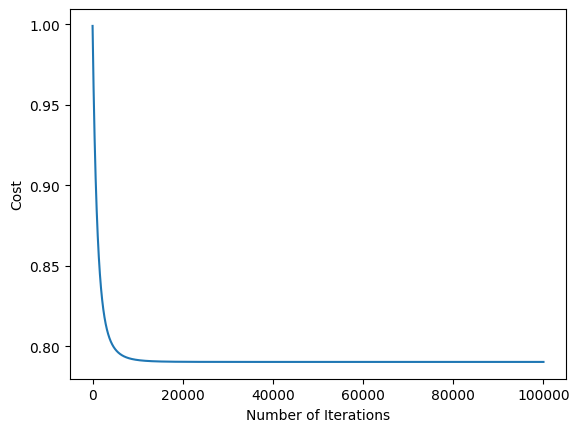

Linear Accuracy:  0.20786516853932585


In [285]:
# normalize the data
# we will use the mean and standard deviation of the training data to normalize the testing data

bta = 1

# normalize the training data
train_data = (train_data - train_data.mean()) / train_data.std()

# normalize the testing data
test_data = (test_data - train_data.mean()) / train_data.std()

# create the y_train
y_train = train_data['Survived'].values
# create the x_train
x_train = train_data.drop(['Survived'], axis=1).values

# create the y_test
y_test = test_data['Survived'].values
# create the x_test
x_test = test_data.drop(['Survived'], axis=1).values

# initialize the weights
w = np.zeros(x_train.shape[1])

# initialize the bias term
b = 1

# initialize the learning rate
alpha = 0.0003
# initialize the number of iterations
num_iters = 100000

# define the linear cost function
def linear_cost_function(x, y, w, b):
    m = len(y)
    return (1 / (2 * m)) * np.sum((np.dot(x, w) + b - y) ** 2)


# define the linear gradient function for w and bias term
def linear_gradient_function(x, y, w, b):
    m = len(y)
    dw =  (1 / m) * np.dot(x.T, (np.dot(x, w) - y))
    db =  (1 / m) * np.sum((np.dot(x, w) - y))
    return dw, db

# define the linear gradient descent function
def linear_gradient_descent(x, y, w, b, alpha, num_iters):
    cost_history = np.zeros(num_iters)
    for i in range(num_iters):
        dw, db = linear_gradient_function(x, y, w, b)
        w = w - alpha * dw
        b = b - alpha * db
        cost_history[i] = linear_cost_function(x, y, w, b)
    return w, b, cost_history

# run the linear gradient descent function
w, b, cost_history = linear_gradient_descent(x_train, y_train, w, b, alpha, num_iters)


# plot the cost history
plt.plot(range(num_iters), cost_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.show()

# define the linear prediction function
def linear_prediction(x, w, b):
    return np.dot(x, w) + b


# define the linear accuracy function
def linear_accuracy(x, y, w, b):
    predictions = linear_prediction(x, w, b)
    predictions[predictions >= 0.5] = 1
    predictions[predictions < 0.5] = 0
    return (predictions == y).mean()

# print the linear accuracy
print('Linear Accuracy: ', linear_accuracy(x_test, y_test, w, b))






In [286]:
# load new test data and make predictions
new_test_data = pd.read_csv('test.csv')

# save the PassengerId column  
passenger_id = new_test_data['PassengerId']

# drop the columns that we don't need
new_test_data = new_test_data.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)

# replace Name with the length of the name
new_test_data['Name'] = new_test_data['Name'].apply(lambda x: len(x))

# replace Sex with 0 for female, 1 for male
new_test_data['Sex'] = new_test_data['Sex'].apply(lambda x: 1 if x == 'male' else x)
new_test_data['Sex'] = new_test_data['Sex'].apply(lambda x: 0 if x == 'female' else x)

# replace the missing age values with the mean age
mean_age = new_test_data['Age'].mean()
new_test_data.loc[new_test_data['Age'].isnull(), 'Age'] = mean_age

# replace the missing SibSp values with the mean SibSp
mean_sibsp = new_test_data['SibSp'].mean()
new_test_data.loc[new_test_data['SibSp'].isnull(), 'SibSp'] = mean_sibsp

# replace the missing Parch values with the mean Parch
mean_parch = new_test_data['Parch'].mean()
new_test_data.loc[new_test_data['Parch'].isnull(), 'Parch'] = mean_parch

# replace the missing Fare values with the mean Fare
mean_fare = new_test_data['Fare'].mean()
new_test_data.loc[new_test_data['Fare'].isnull(), 'Fare'] = mean_fare

# replace Emparked with 0 for S, 1 for C, 2 for Q
new_test_data['Embarked'] = new_test_data['Embarked'].apply(lambda x: 0 if x == 'S' else x)
new_test_data['Embarked'] = new_test_data['Embarked'].apply(lambda x: 1 if x == 'C' else x)
new_test_data['Embarked'] = new_test_data['Embarked'].apply(lambda x: 2 if x == 'Q' else x)

# replace the missing Embarked values with the mean Embarked
mean_embarked = new_test_data['Embarked'].mean()
new_test_data.loc[new_test_data['Embarked'].isnull(), 'Embarked'] = mean_embarked

# normalize the new test data
# remove survived column from the train data
train_data1 = train_data.drop(['Survived'], axis=1)
new_test_data = (new_test_data - train_data1.mean()) / train_data1.std()

# add the bias term to the new test data
# new_test_data = np.insert(new_test_data.values, 0, 1, axis=1)

# make predictions
predictions = linear_prediction(new_test_data, w, b)
predictions[predictions >= 0.5] = int(1)
predictions[predictions < 0.5] = int(0)

# save the predictions to a csv file
np.savetxt('predictions.csv', predictions, delimiter=',', fmt='%d')

# create a submission file
submission = pd.DataFrame({
    'PassengerId': passenger_id,
    'Survived': predictions.astype(int)
})
submission.to_csv('submission.csv', index=False)

# print the submission file
print(submission)

# print survival rate
print('Survival Rate: ', submission['Survived'].mean())

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
Survival Rate:  0.37799043062200954
